# Diagrama de radiação de uma antena

Função que recebe nome dum ficheiro .msi com diagrama de radiação e desenha diagramas polares Horizontal e Vertical

In [6]:
from matplotlib import pyplot as plt
import math

def desenha_diagrama_radiacao(ficheiro):
    
    ganho_minimo = -40

    with open(ficheiro) as file:
        dados = file.readlines()

        indice_horizontal = dados.index("HORIZONTAL 360\n")

        indice_vertical = dados.index("VERTICAL 360\n")

        print(indice_horizontal, indice_vertical)

        # construir as listas horizontal e vertical

        angulos = []

        horizontal = []

        for linha in dados[indice_horizontal+1 : indice_vertical]:
            angulo,ganho = linha.split()
            angulos.append(float(angulo) / 360 * 2 * math.pi)
            horizontal.append(max(-float(ganho), ganho_minimo))

        vertical = [max(-float(linha.split()[1]), ganho_minimo) for linha in dados[indice_vertical + 1:]]


        h = plt.subplot(projection="polar")
        h.plot(angulos,horizontal, "red", label="horizontal")

        h.set_title('Diagrama Horizontal', pad=20, size=16)
        h.set_rgrids([r for r in range(0, ganho_minimo, -5)])  # grid radial    
        h.set_thetagrids([r for r in range(0, 360, 15)])  # grid angular
        h.set_theta_direction(-1)  
        h.set_theta_offset(math.pi/2)
        h.set_rmin(ganho_minimo)

        plt.legend()
        plt.show()


        v = plt.subplot(projection="polar")
        v.plot(angulos, vertical, "green", label="vertical")

        v.set_title('Diagrama Vertical', pad=20, size=16)
        v.set_rgrids([r for r in range(0, ganho_minimo, -5)])  # grid radial    
        v.set_thetagrids([r for r in range(0, 360, 15)])  # grid angular
        v.set_theta_direction(-1)  
        v.set_rmin(ganho_minimo)

        plt.legend()
        plt.show()

5 366


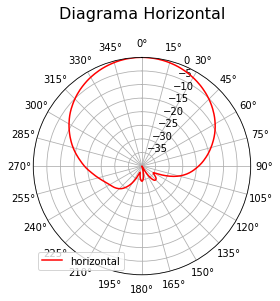

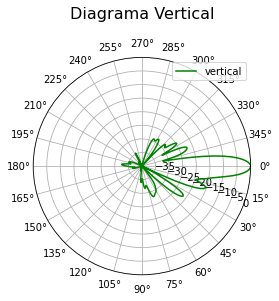

In [7]:
ficheiro = "80010504_1750_x_co_m45_00t.msi"

desenha_diagrama_radiacao(ficheiro)